In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df_staff_loc = pd.read_csv("../data/REMS off-campus room.csv")
df_staff_loc = df_staff_loc[:84]
df_staff_loc = df_staff_loc.rename(columns={"Unnamed: 0": "Date"})
df_staff_loc = df_staff_loc[['Date', 'Shifts w room (12hr)', 'Hours with Room', 'Rolling Average', 'Month / Year']]
df_staff_loc

,Date,Shifts w room (12hr),Hours with Room,Rolling Average,Month / Year
0,2017/1/1,8.0,96.0,96.0,"42,736"
1,2017/2/1,14.0,168.0,132.0,"42,767"
2,2017/3/1,14.0,168.0,144.0,"42,795"
3,2017/4/1,12.0,144.0,144.0,"42,826"
4,2017/5/1,0.0,0.0,120.0,"42,856"
...,...,...,...,...,...
79,2023/8/1,20.0,240.0,210.0,"45,139"
80,2023/9/1,52.0,624.0,279.0,"45,170"
81,2023/10/1,51.0,612.0,405.0,"45,200"
82,2023/11/1,60.0,720.0,549.0,"45,231"


## Autocorrelation Plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

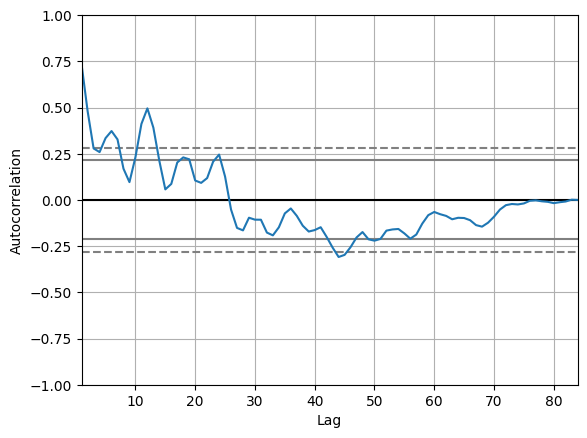

In [3]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_staff_loc['Hours with Room'])

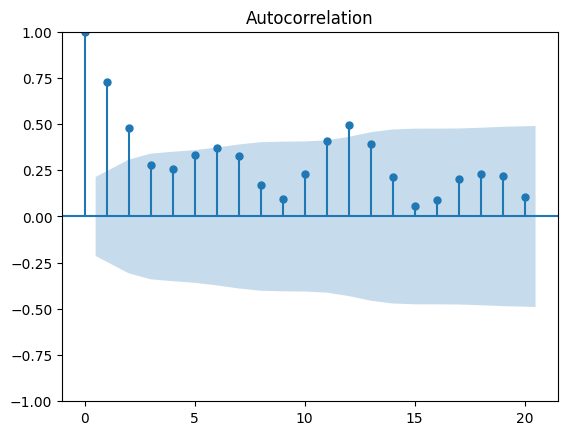

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_staff_loc['Hours with Room'])
plt.show()

## Augmented Dickey-Fuller Test

In [7]:
# dftest = adfuller(df_staff_loc['Hours with Room'], autolag = 'AIC')
# print("1. ADF : ",dftest[0])
# print("2. P-Value : ", dftest[1])
# print("3. Num Of Lags : ", dftest[2])
# print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
# print("5. Critical Values :")
# for key, val in dftest[4].items():
#     print("\t",key, ": ", val)

NameError: name 'adfuller' is not defined

## SARIMA model

In [10]:
import pmdarima as pmd

model=pmd.auto_arima(df_staff_loc['Hours with Room'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1160.071, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1148.363, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1154.472, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1158.087, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1161.997, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1144.215, Time=0.54 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1145.587, Time=1.22 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1143.636, Time=0.54 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1155.049, Time=0.18 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1145.604, Time=1.35 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1147.682, Time=0.48 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.80 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1145.756, Time=1.15 sec
 ARIMA(2,1,0)(1,0,1)[12] inte

In [ ]:
!pip install pmdarima

In [12]:
import statsmodels.api as sm

In [14]:
#Best model:  ARIMA(1,1,1)(1,0,1)[12]
sarima=sm.tsa.statespace.SARIMAX(df_staff_loc['Hours with Room'],order=(1,1,1),seasonal_order=(1,0,1,12))
predicted=sarima.fit().predict();predicted

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0       0.000000
1      94.857003
2     153.168365
3     155.585007
4     139.163854
         ...    
79    435.788923
80    608.694358
81    726.859661
82    635.263626
83    561.443256
Name: predicted_mean, Length: 84, dtype: float64

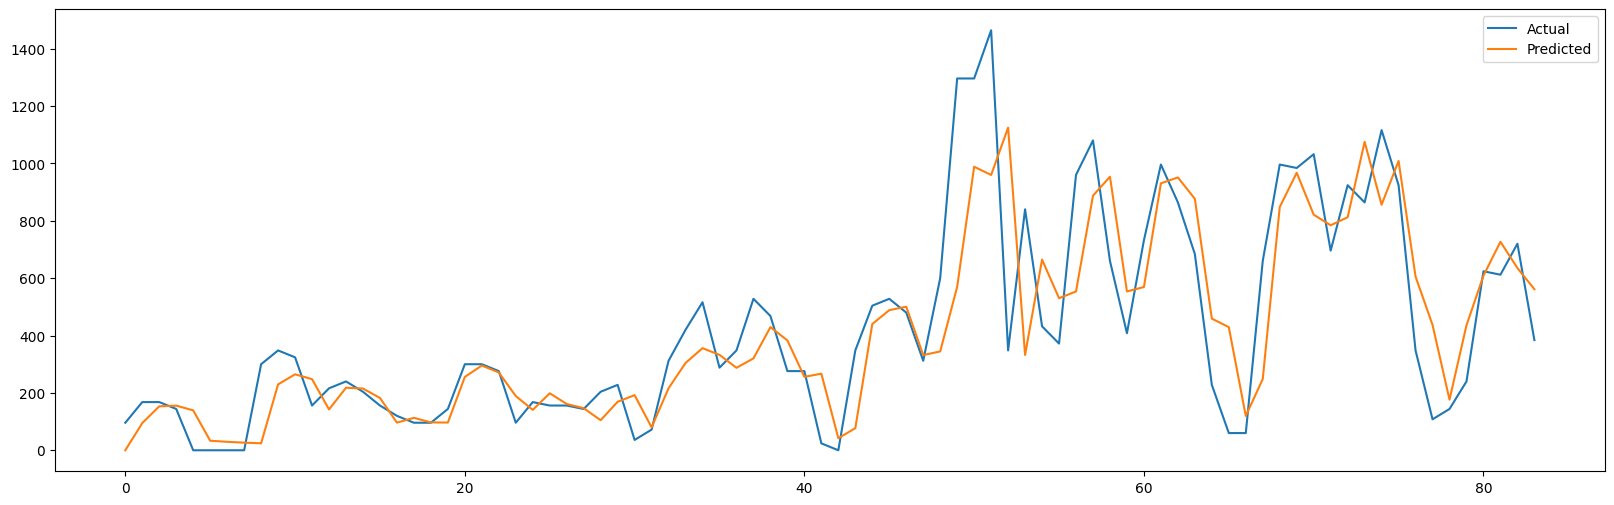

In [15]:
plt.figure(figsize=(20,6))
plt.plot(df_staff_loc['Hours with Room'],label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()

In [17]:
resid=df_staff_loc['Hours with Room']-predicted;resid
mae=abs(resid.mean());mae
# Mean absolute error = 15

15.406999521690548

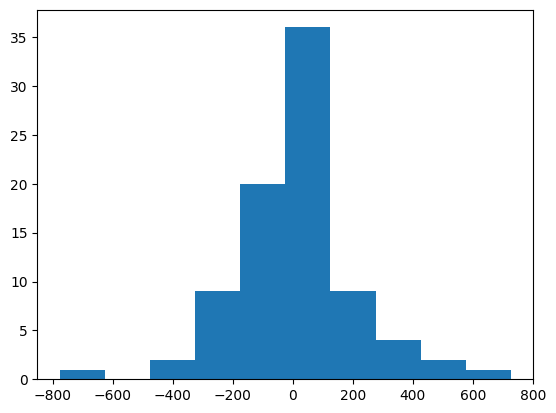

In [18]:
plt.hist(resid)
plt.show()

In [19]:
(resid**2).mean() #mse

42291.556158834166

In [20]:
model=pmd.auto_arima(df_staff_loc['Hours with Room'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1160.071, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1148.363, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1154.472, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1158.087, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1161.997, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1144.215, Time=0.52 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1145.587, Time=1.30 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1143.636, Time=0.54 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1155.049, Time=0.18 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1145.604, Time=1.41 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1147.682, Time=0.46 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.58 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1145.756, Time=0.94 sec
 ARIMA(2,1,0)(1,0,1)[12] inte

In [22]:
pred=model.predict(n_periods=12);pred

84    610.819129
85    774.540313
86    837.596390
87    776.647241
88    440.152638
89    393.158602
90    350.150722
91    498.724896
92    754.678991
93    771.942966
94    761.597955
95    558.610375
dtype: float64

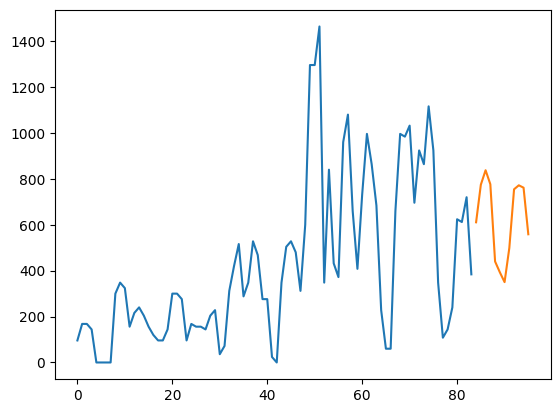

In [23]:
plt.plot(df_staff_loc['Hours with Room'])
plt.plot(pred)